In [1]:
# Suitable habitat per species for climatological (historical) data
# use T and DO, surface and bottom
# per species

In [10]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore') # filter some warning messages
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [11]:
# large data path
ldp = '~/Documents/LargeData/'

In [12]:
#get bathymetry from ETOPO1
fn = ldp+'/Etopo/ETOPO1_Ice_g_gmt4.grd'
ds_topo = xr.open_dataset(fn)
ds_topo.close()
topo = ds_topo.z  #(10801, 21601)
topo2=topo.sel(y=slice(ldom[0,0],ldom[0,1]),x=slice(ldom[1,0],ldom[1,1]))
x = topo2.x  #21601
y = topo2.y   #10801
X,Y=np.meshgrid(x,y)
ldom = np.array([[42, 50],[-130, -122]])
qbox = np.array([[-124.05,-124.33,-125.07,-124.774,-124.05],[46.53,47.4,47.4,46.53,46.53]])

In [8]:
fdir = ldp+'QIN/Glorys_Model/'
ds_T = xr.open_dataset(fdir+'climatology_glorys12v1_thetao_v1.nc')
ds_T.close()
ds_T

<xarray.Dataset>
Dimensions:  (depth: 44, lat: 301, lon: 361, time: 12)
Coordinates:
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * depth    (depth) float32 0.494025 1.541375 2.645669 ... 2865.703 3220.82
  * lon      (lon) float32 220.0 220.08333 220.16667 ... 249.91666 250.0
  * lat      (lat) float32 30.0 30.083334 30.166666 ... 54.833332 54.916668 55.0
Data variables:
    thetao   (time, depth, lat, lon) float64 ...

## for surface, 'bottom' (needs to be calculated), and 2 mid depths, plot suitable areas

# Dungeness Crab and Razon Clams
## Depth range: [40/5-90/28] -> surface : 40 : 100
## Distance from shore: [0-89-59] -> 100k
## Temperature: [5.36/5.99-11.72/12.73] -> 5.5 : 12

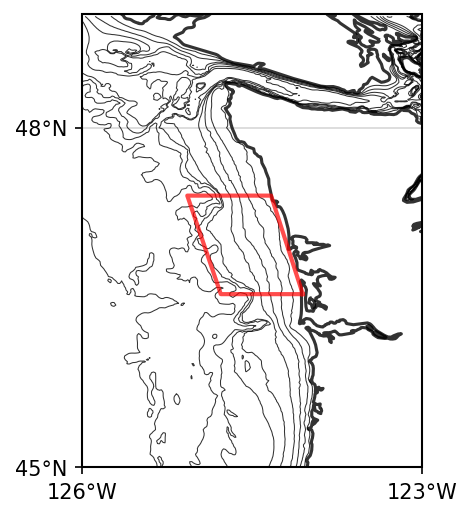

In [13]:
ldom = np.array([[45, 49],[-126, -123]])
fig=plt.figure(figsize=(4,4),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
ax.set_extent([ldom[1,0],ldom[1,1],ldom[0,0],ldom[0,1]],crs=ccrs.PlateCarree())
ax.set_xticks([*range(ldom[1,0],ldom[1,1]+1,3)], crs=ccrs.PlateCarree())
ax.set_yticks([*range(ldom[0,0],ldom[0,1]+1,3)], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
plt.grid(True, zorder=0,alpha=0.5)
#ax.set_aspect(1.5)
plt.contour(X,Y,topo2,[-2000,-1000,-500,-200,-150, -100,-75, -50,-25],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.8)
plt.plot(qbox[0,:],qbox[1,:],c='r',lw=2,zorder=5, alpha=0.7)
#fig.savefig('./map_base_xsmall.png')
plt.show()